In [12]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("AirPax.csv")
data.head(5)

,Year,Month,Pax
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
data.tail()

,Year,Month,Pax
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [4]:
airpax=data.Pax

Text(0,0.5,'Pax')

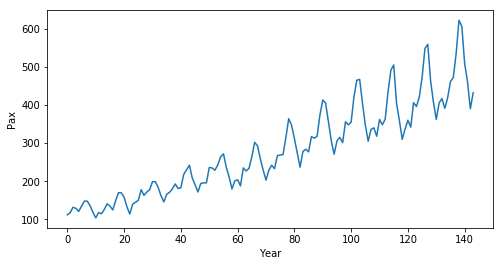

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(airpax)
plt.xlabel('Year')
plt.ylabel('Pax')

In [6]:
#Determing rolling statistics
rolmean = airpax.rolling(window=12).mean()
rolstd = airpax.rolling(window=12).std()

Text(0.5,1,'Rolling Mean & Standard Deviation')

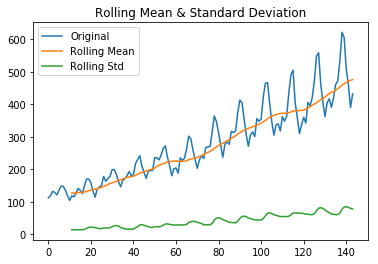

In [7]:
#Plot rolling statistics:
orig = plt.plot(airpax, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
dftest = adfuller(airpax)
dftest

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
monthly_airpax = pd.pivot_table(data, values = "Pax", columns = "Year", index = "Month")
monthly_airpax

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Apr,129,135,163,181,235,227,269,313,348,348,396,461
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Dec,118,140,166,194,201,229,278,306,336,337,405,432
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Mar,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


In [11]:
monthly_airpax = monthly_airpax.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_airpax=monthly_airpax.T

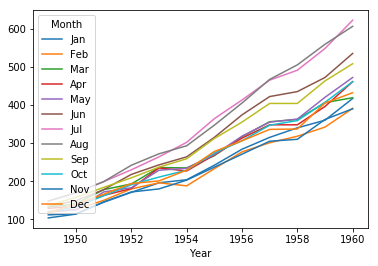

In [12]:
monthly_airpax.plot()

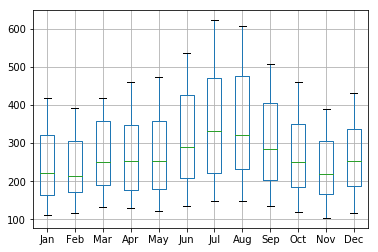

In [13]:
monthly_airpax.boxplot()

In [14]:
decomposition = sm.tsa.seasonal_decompose(data.Pax, model='multiplicative', freq=12)

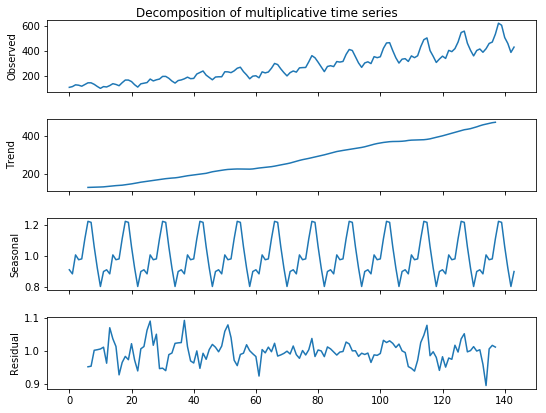

In [15]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Text(0,0.5,'Tractor Sales')

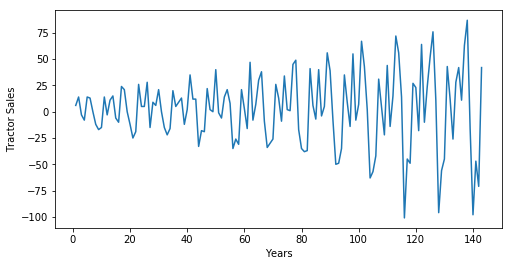

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(airpax.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

Text(0,0.5,'Log (airpax)')

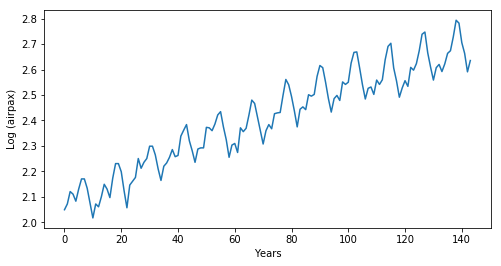

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(airpax))
plt.xlabel('Years')
plt.ylabel('Log (airpax)')

Text(0,0.5,'Differenced Log (airpax)')

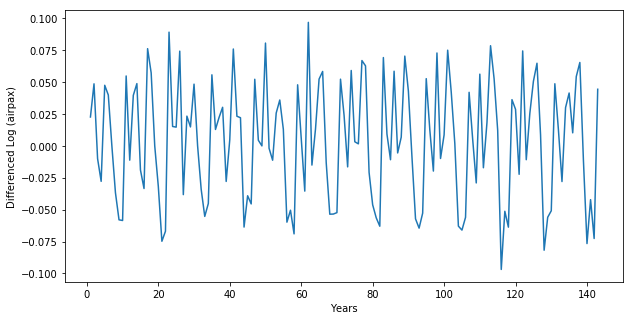

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(airpax).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (airpax)')

In [19]:
pax_ts_log = np.log10(airpax)
pax_ts_log.dropna(inplace=True)

pax_ts_log_diff = pax_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
pax_ts_log_diff.dropna(inplace=True)

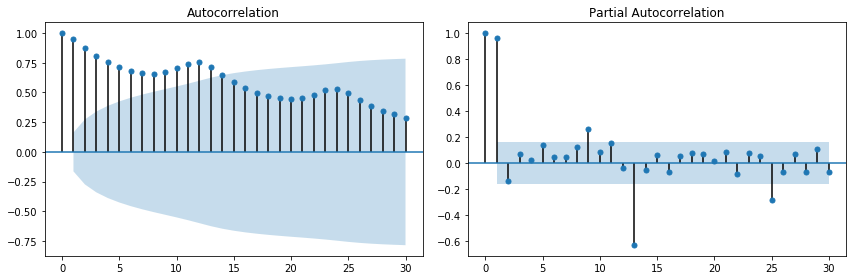

In [20]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(airpax, lags=30, ax=axes[0])
smt.graphics.plot_pacf(pax_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

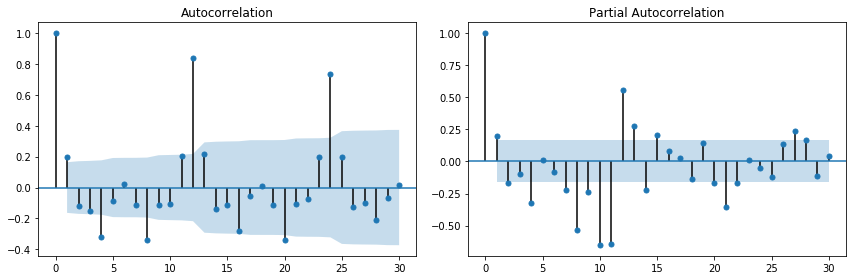

In [21]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(pax_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(pax_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [22]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [23]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [24]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [29]:
data['date'] = data.index
train = data[0:int(len(data)*0.7)]
test = data[int(len(data)*0.7):]
train_pax_ts_log = np.log10(train['Pax'])

In [34]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAXNonexNone12 model - AIC:inf


In [36]:
best_model = sm.tsa.statespace.SARIMAX(train_pax_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [37]:
print(best_results.summary().tables[0])

                                 Statespace Model Results                                 
Dep. Variable:                                Pax   No. Observations:                  100
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 249.879
Date:                            Wed, 19 Dec 2018   AIC                           -491.758
Time:                                    14:31:29   BIC                           -481.378
Sample:                                         0   HQIC                          -487.559
                                            - 100                                         
Covariance Type:                              opg                                         


In [38]:
print(best_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3294      0.095     -3.472      0.001      -0.515      -0.143
ar.S.L12       0.9911      0.008    127.570      0.000       0.976       1.006
ma.S.L12      -0.6160      0.124     -4.974      0.000      -0.859      -0.373
sigma2         0.0003    3.8e-05      7.193      0.000       0.000       0.000


In [39]:
param_order = (0, 1, 1)
param_seasonal_order = (0, 1, 1, 12)
model = sm.tsa.statespace.SARIMAX(train_pax_ts_log, order=param_order, 
                                  seasonal_order=param_seasonal_order,enforce_stationarity=True)
results = model.fit()
print("SARIMAX{}x{}12 model - AIC:{}".format(param_order, param_seasonal_order, results.aic))

SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:-454.8399856335335


In [47]:
train.tail()

,Year,Month,Pax,date
95,1956,Dec,306,95
96,1957,Jan,315,96
97,1957,Feb,301,97
98,1957,Mar,356,98
99,1957,Apr,348,99


In [48]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1957-04-30'), dynamic=True, full_results=True) 

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timestamp'

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("AirPax.csv")
data.head(5)

,Year,Month,Pax
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
d=[] 

In [9]:
for i in range(20):
    k=i*0.5
    print(k)
    if i==0:
        d[i]=data[int(len(data)*i):int(len(data)*0.5)]
    else:
        d[i]=data[int(len(data)*k):int(len(data)*i)]
    

0.0


IndexError: list assignment index out of range

In [27]:
len(d1)+len(d2)+len(d3)+len(d4)+len(d5)+len(d6)+len(d7)+len(d8)+len(d9)+len(d10)

144